In [2]:
import os
print(os.getcwd())


/home/cian/Ferrero_Tech_Assesment/notebooks/data_exploration


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '../../data/raw/Retail_Sales_Data.csv'  
df = pd.read_csv(data_path)
df.head()



,retailer,store_id,week,product,description,regular_price,competition_1_regular_price,competition_2_regular_price,competition_3_regular_price,competition_4_regular_price,...,competition_4_promo_price,competition_5_promo_price,competition_6_promo_price,competition_7_promo_price,competition_8_promo_price,competition_9_promo_price,competition_10_promo_price,value,volume,quantity
0,retail1,1,1,MintyFresh Mint 18g,MintyFresh refresh mint 18grams,10.308645,10.624815,10.013451,10.378847,9.910385,...,8.500521,7.139537,7.606831,8.339536,7.184384,5.759620,7.376553,85.368310,3.953882,9.707949
1,retail1,1,1,ChocoDelight Dark 200g,200g ChocoDelight smooth,7.947956,7.748726,7.589198,8.085262,7.602363,...,5.766135,4.267236,5.912718,5.156558,6.976287,5.884786,5.335849,82.924731,2.991418,14.922586
2,retail1,1,1,ChocoDelight White 350g,350g ChocoDelight delicious,13.439368,13.751508,13.183621,13.875440,12.982707,...,8.195118,8.214548,8.995387,10.266603,10.940801,8.727031,7.915147,52.527762,6.513600,12.889607
3,retail1,1,1,NuttyCream Hazelnuts 80g,delightful Hazelnuts 80g NuttyCream,5.112777,5.279713,5.222118,5.117789,4.877549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.373782,5.489587,14.374834
4,retail1,1,1,DarkDream Dark 60g,A decadent DarkDream dark chocolate ice cream ...,14.085425,14.153721,13.860002,14.339698,14.365517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.718252,9.152050,9.193818


### Initial Data Exploration

In [4]:
print("Shape of dataset:", df.shape)
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe(include='all'))

Shape of dataset: (8840, 30)
Data Types:
 retailer                         object
store_id                          int64
week                              int64
product                          object
description                      object
regular_price                   float64
competition_1_regular_price     float64
competition_2_regular_price     float64
competition_3_regular_price     float64
competition_4_regular_price     float64
competition_5_regular_price     float64
competition_6_regular_price     float64
competition_7_regular_price     float64
competition_8_regular_price     float64
competition_9_regular_price     float64
competition_10_regular_price    float64
promo_price                     float64
competition_1_promo_price       float64
competition_2_promo_price       float64
competition_3_promo_price       float64
competition_4_promo_price       float64
competition_5_promo_price       float64
competition_6_promo_price       float64
competition_7_promo_price       float6

Missing Values:
 retailer                           0
store_id                           0
week                               0
product                            0
description                        0
regular_price                      0
competition_1_regular_price        0
competition_2_regular_price        0
competition_3_regular_price        0
competition_4_regular_price        0
competition_5_regular_price        0
competition_6_regular_price        0
competition_7_regular_price        0
competition_8_regular_price        0
competition_9_regular_price        0
competition_10_regular_price       0
promo_price                     8194
competition_1_promo_price       8194
competition_2_promo_price       8194
competition_3_promo_price       8194
competition_4_promo_price       8194
competition_5_promo_price       8194
competition_6_promo_price       8194
competition_7_promo_price       8194
competition_8_promo_price       8194
competition_9_promo_price       8194
competition_10_promo_

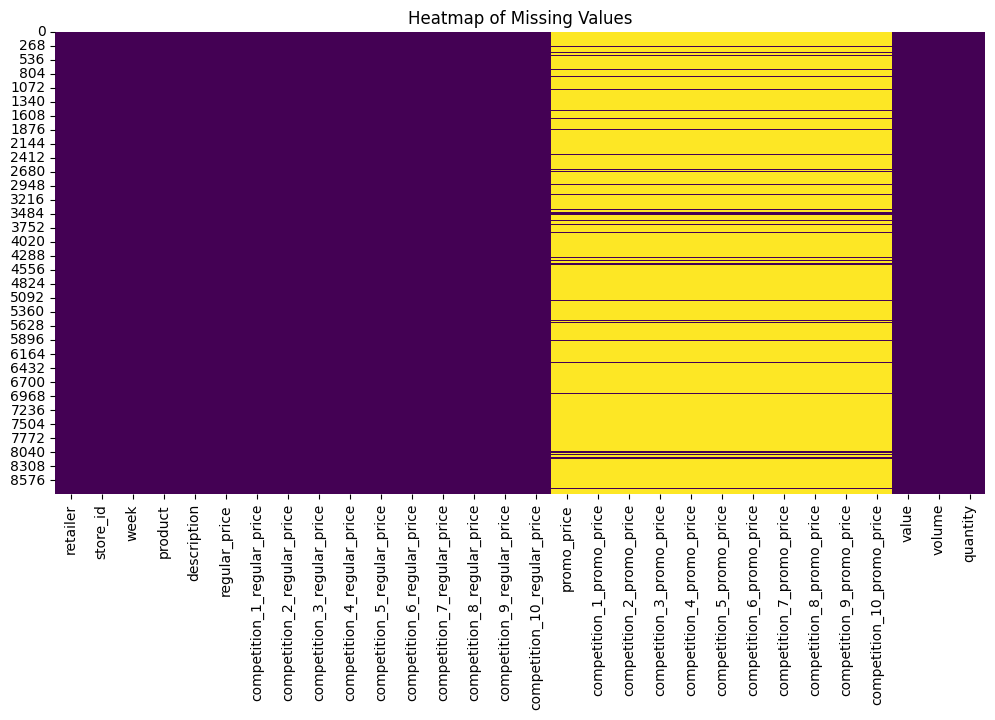

Outliers in store_id: 0
Outliers in week: 0
Outliers in regular_price: 0
Outliers in competition_1_regular_price: 0
Outliers in competition_2_regular_price: 0
Outliers in competition_3_regular_price: 0
Outliers in competition_4_regular_price: 0
Outliers in competition_5_regular_price: 0
Outliers in competition_6_regular_price: 0
Outliers in competition_7_regular_price: 0
Outliers in competition_8_regular_price: 0
Outliers in competition_9_regular_price: 0
Outliers in competition_10_regular_price: 0
Outliers in promo_price: 0
Outliers in competition_1_promo_price: 0
Outliers in competition_2_promo_price: 0
Outliers in competition_3_promo_price: 0
Outliers in competition_4_promo_price: 0
Outliers in competition_5_promo_price: 0
Outliers in competition_6_promo_price: 0
Outliers in competition_7_promo_price: 0
Outliers in competition_8_promo_price: 0
Outliers in competition_9_promo_price: 0
Outliers in competition_10_promo_price: 0
Outliers in value: 0
Outliers in volume: 0
Outliers in qua

In [5]:
print("Missing Values:\n", df.isnull().sum())

# Visualize missing values heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

# Identify outliers using IQR method for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))
    outlier_count = outliers.sum()
    print(f"Outliers in {column}: {outlier_count}")

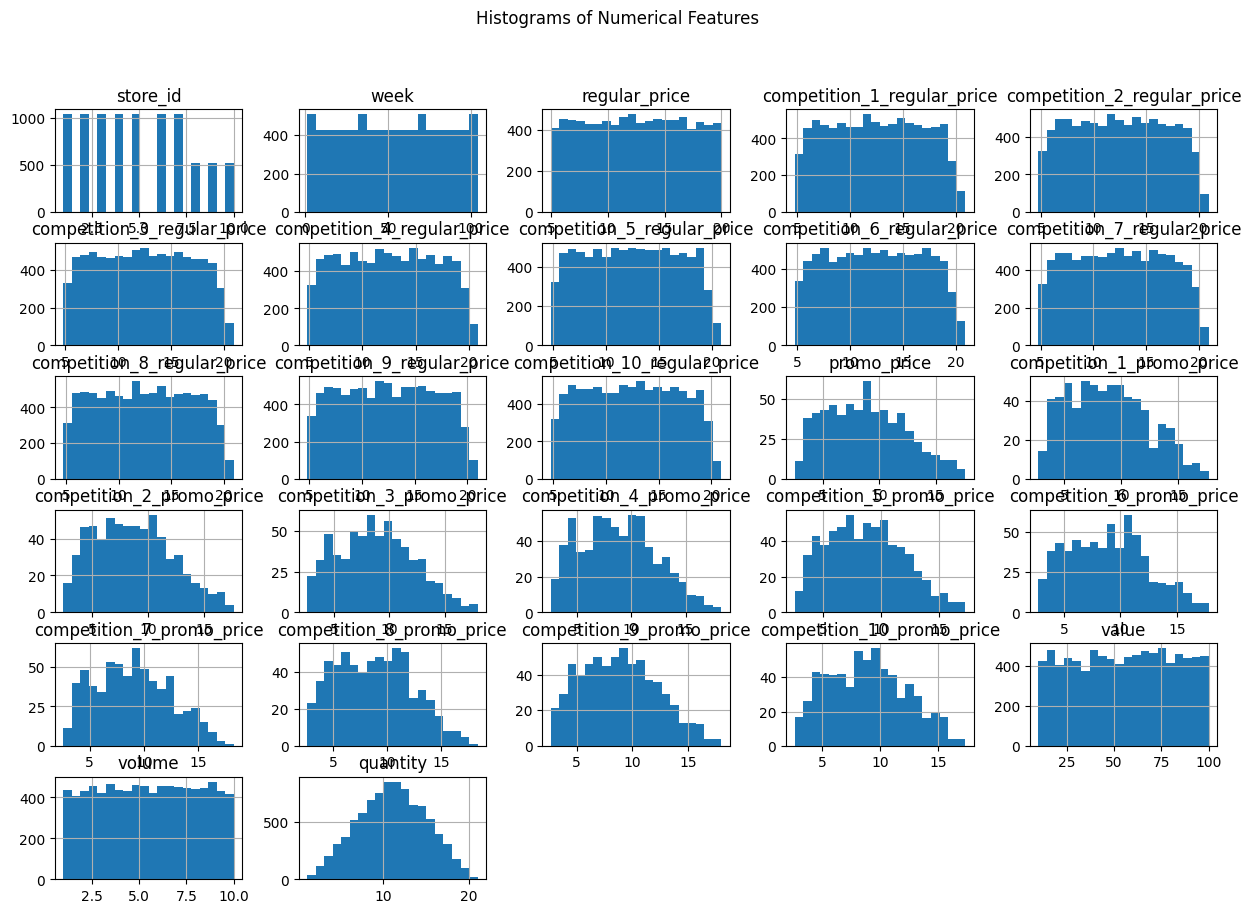

ValueError: num must be an integer with 1 <= num <= 16, not 17

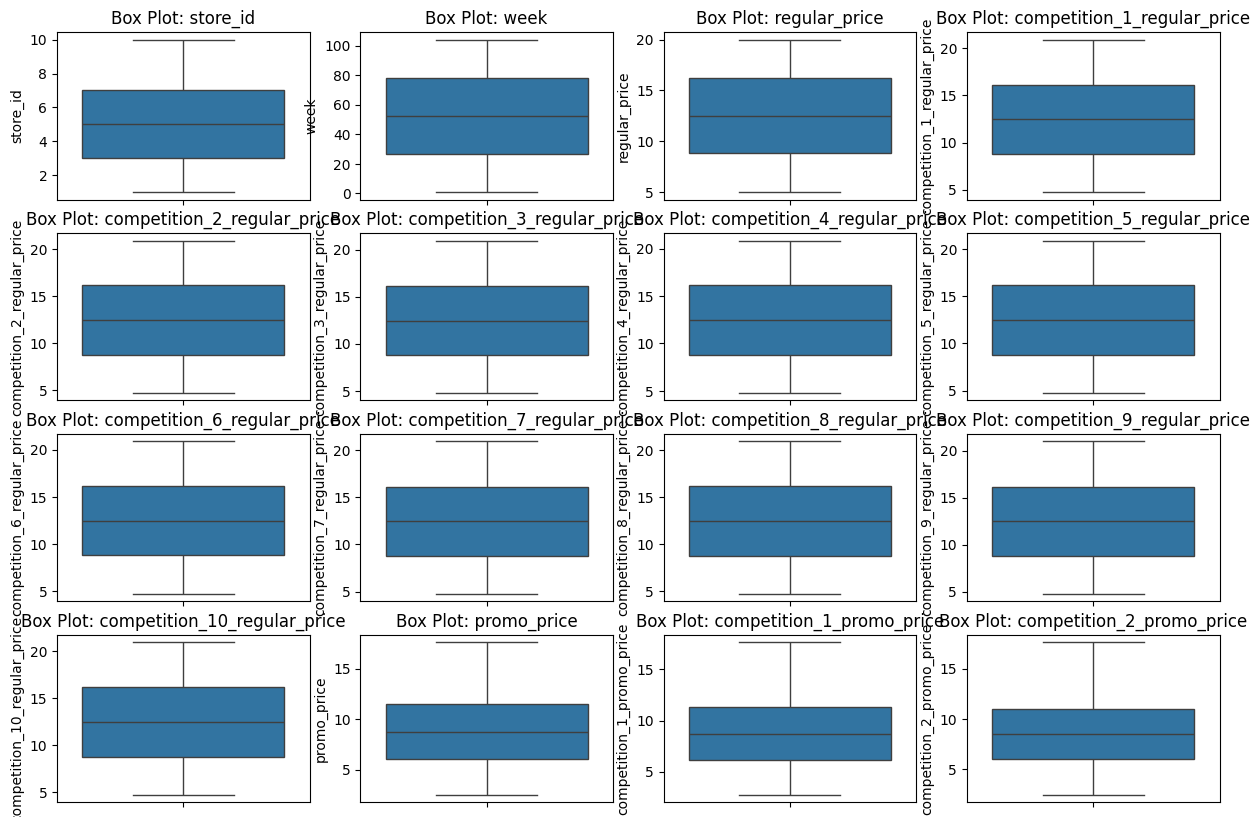

In [6]:
# Histograms for numeric columns
df.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Box plots to visually inspect distribution and outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[column])
    plt.title(f"Box Plot: {column}")
plt.tight_layout()
plt.show()

Unique values in retailer: 2
retail1    5200
retail2    3640
Name: retailer, dtype: int64 

Unique values in product: 5
MintyFresh Mint 18g         1768
ChocoDelight Dark 200g      1768
ChocoDelight White 350g     1768
NuttyCream Hazelnuts 80g    1768
DarkDream Dark 60g          1768
Name: product, dtype: int64 

Unique values in description: 20
A refreshing MintyFresh candy with a weight of 9gx2                                472
delightful Hazelnuts 80g NuttyCream                                                458
80g NuttyCream flavor Hazelnuts                                                    455
A decadent DarkDream dark chocolate ice cream with a weight of 60 grams.           454
ChocoDelight Dark 200g rich                                                        452
A creamy and delicious ChocoDelight white chocolate bar weighing 350g(300g+50g)    448
decadent Dark 60g DarkDream                                                        447
ChocoDelight White 350g creamy             

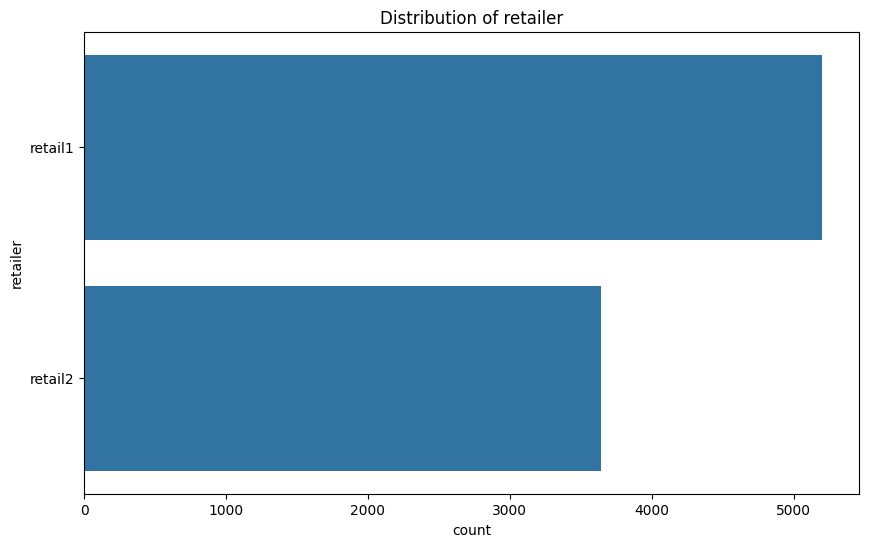

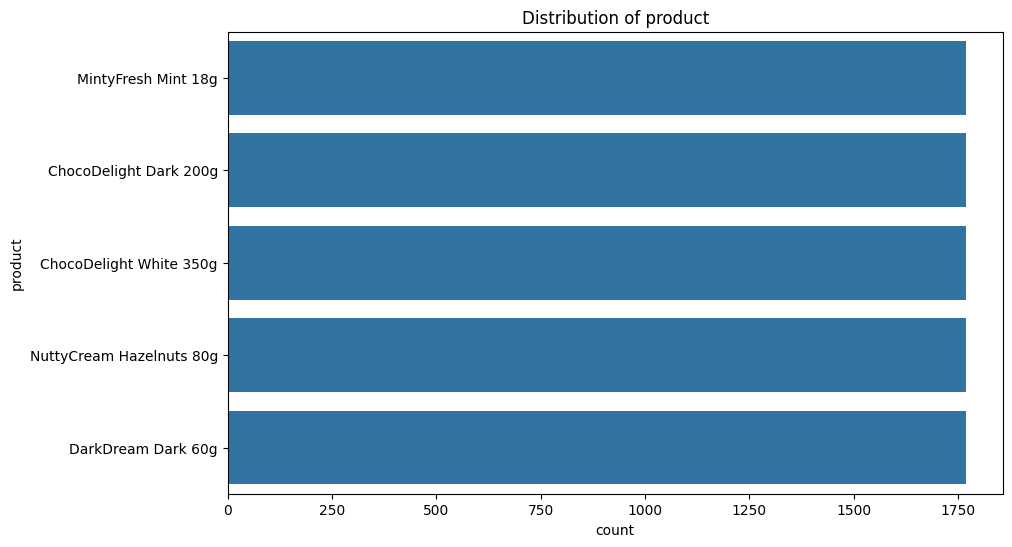

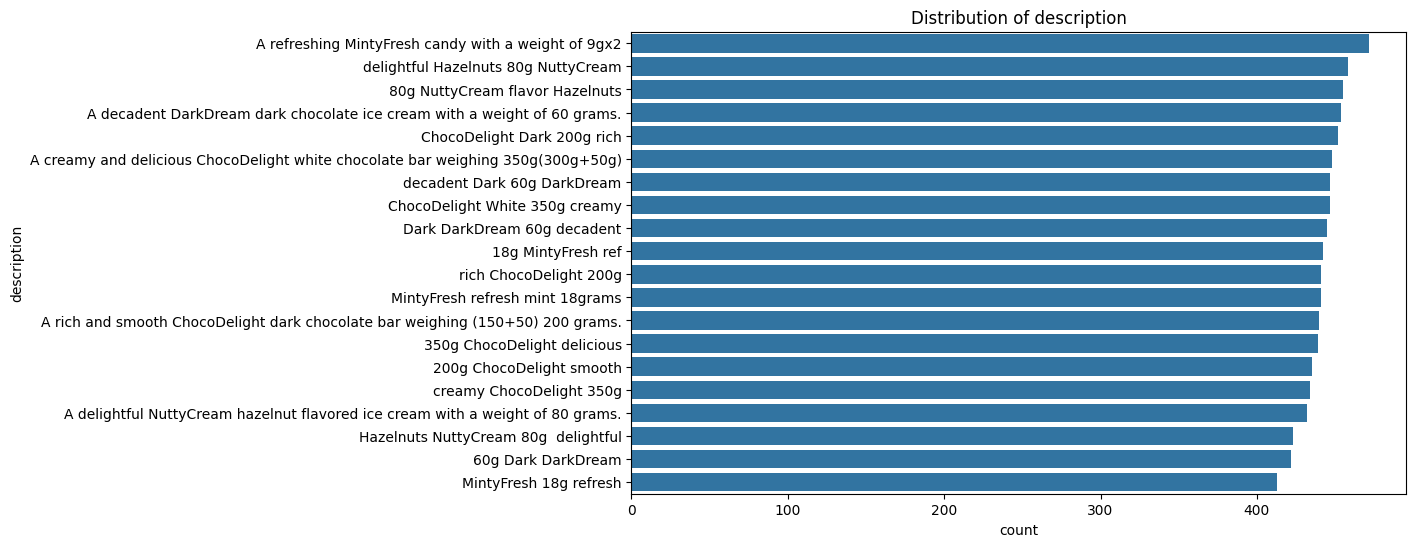

In [ ]:
# Examine unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].nunique()}")
    print(df[col].value_counts(), "\n")

# Plot count distributions of categorical variables
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()


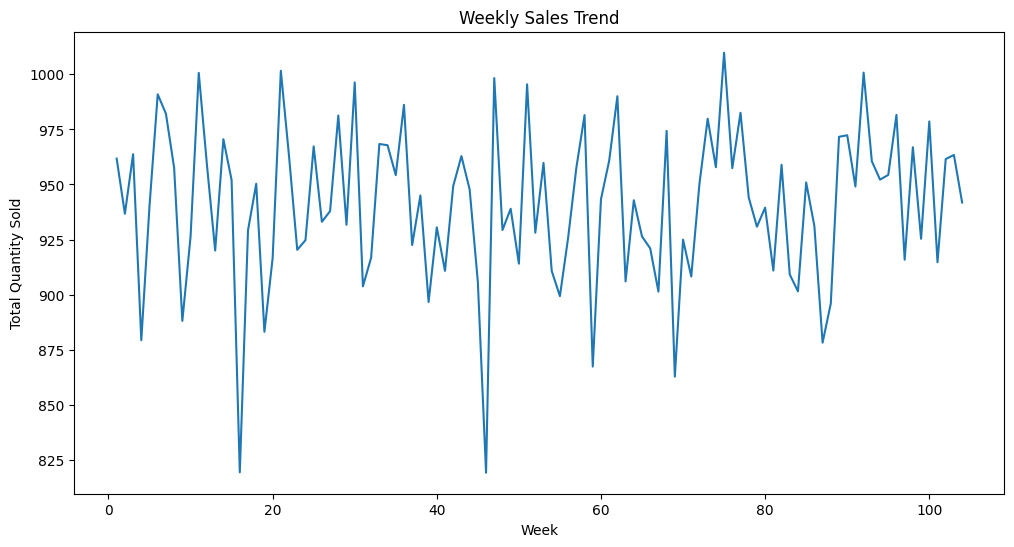

In [ ]:
# Aggregate `quantity` by `week` to explore trends over time
weekly_sales = df.groupby('week')['quantity'].sum()

# Plot the weekly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales)
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Quantity Sold")
plt.show()


/tmp/ipykernel_142811/2734588586.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


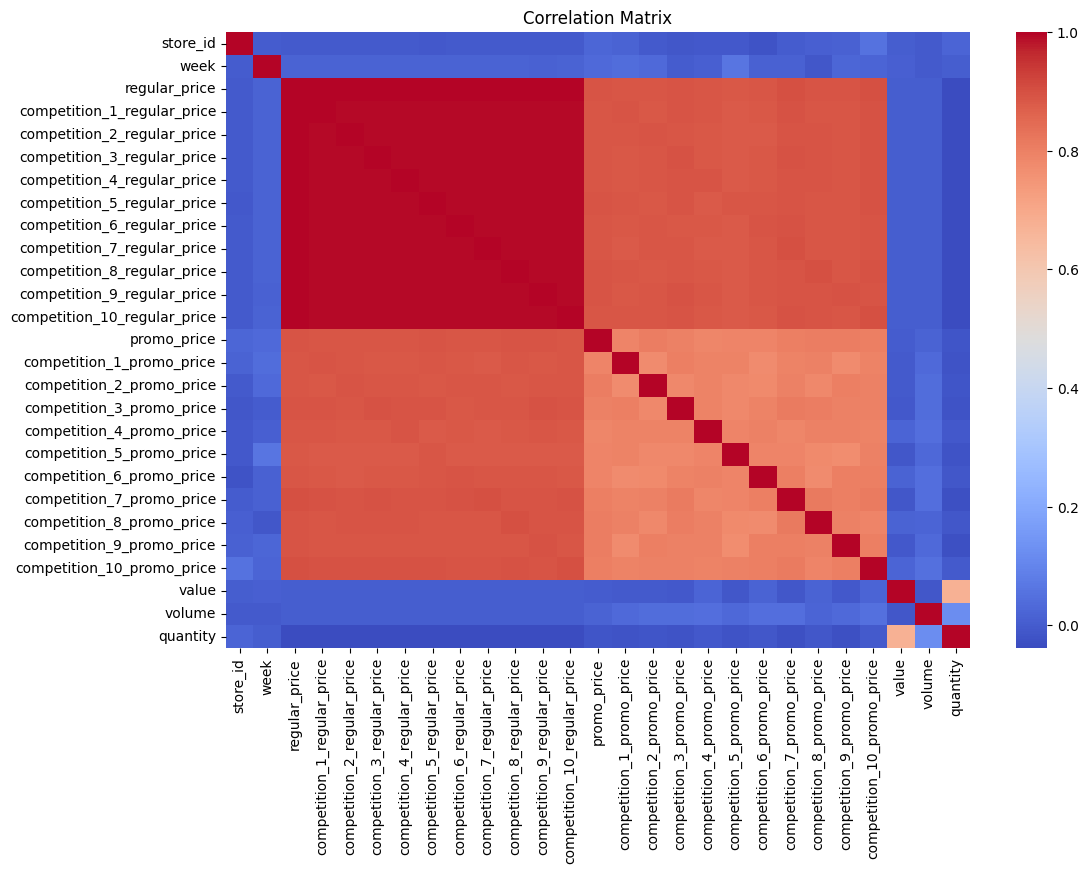

In [7]:
# Compute and plot correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Extra Feature Engineering if Nescesary 

Promo Active Indicator:

In [3]:
for col in df.filter(like='competition_promo_price').columns:
    df[f'{col}_active'] = (df[col] > 0).astype(int)

Discount Depth:

In [ ]:
for i in range(1, 11):  
    df[f'competition_{i}_discount_depth'] = (
        df[f'competition_{i}_regular_price'] - df[f'competition_{i}_promo_price']
    ).clip(lower=0)

Average Discount Depth:

In [5]:
discount_columns = [f'competition_{i}_discount_depth' for i in range(1, 11)]
df['avg_competition_discount_depth'] = df[discount_columns].mean(axis=1)

Number of Competitors Running Promotions:

In [6]:
promo_active_columns = [f'{col}_active' for col in df.filter(like='competition_promo_price').columns]
df['num_competitors_active_promos'] = df[promo_active_columns].sum(axis=1)


Price Ratio Interaction:

In [7]:
for i in range(1, 11):
    df[f'price_comp_{i}_promo_interaction'] = df['regular_price'] / df[f'competition_{i}_promo_price']


Drop Raw competition_promo_price Columns:

In [15]:
promo_columns = [f'competition_{i}_promo_price' for i in range(1, 11)]
df.drop(columns=promo_columns, inplace=True)


Handle Outliers and Transform Skewed Features

In [10]:
for col in ['quantity', 'value', 'regular_price']:
    upper_limit = df[col].quantile(0.95)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])


In [11]:
df['quantity'] = np.log1p(df['quantity'])
df['value'] = np.log1p(df['value'])

Add Weekly Seasonality:

In [14]:
df['sin_week'] = np.sin(2 * np.pi * df['week'] / 52)
df['cos_week'] = np.cos(2 * np.pi * df['week'] / 52)

Lag Features:

In [12]:
df['quantity_lag_1'] = df['quantity'].shift(1)
df['value_lag_1'] = df['value'].shift(1)
df.fillna(0, inplace=True)  # Fill NaN values created by lagging


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   retailer                         8840 non-null   object 
 1   store_id                         8840 non-null   int64  
 2   week                             8840 non-null   int64  
 3   product                          8840 non-null   object 
 4   description                      8840 non-null   object 
 5   regular_price                    8840 non-null   float64
 6   competition_1_regular_price      8840 non-null   float64
 7   competition_2_regular_price      8840 non-null   float64
 8   competition_3_regular_price      8840 non-null   float64
 9   competition_4_regular_price      8840 non-null   float64
 10  competition_5_regular_price      8840 non-null   float64
 11  competition_6_regular_price      8840 non-null   float64
 12  competition_7_regula

In [17]:
print(df.columns)

Index(['retailer', 'store_id', 'week', 'product', 'description',
       'regular_price', 'competition_1_regular_price',
       'competition_2_regular_price', 'competition_3_regular_price',
       'competition_4_regular_price', 'competition_5_regular_price',
       'competition_6_regular_price', 'competition_7_regular_price',
       'competition_8_regular_price', 'competition_9_regular_price',
       'competition_10_regular_price', 'promo_price', 'value', 'volume',
       'quantity', 'competition_1_discount_depth',
       'competition_2_discount_depth', 'competition_3_discount_depth',
       'competition_4_discount_depth', 'competition_5_discount_depth',
       'competition_6_discount_depth', 'competition_7_discount_depth',
       'competition_8_discount_depth', 'competition_9_discount_depth',
       'competition_10_discount_depth', 'avg_competition_discount_depth',
       'num_competitors_active_promos', 'price_comp_1_promo_interaction',
       'price_comp_2_promo_interaction', 'price_

In [18]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values in each column:\n", missing_values)

# Check for non-numeric data types
print("Data types:\n", df.dtypes)

# Basic summary statistics to understand distributions
print("Summary statistics:\n", df.describe(include='all'))

Missing values in each column:
 retailer                           0
price_comp_3_promo_interaction     0
competition_6_discount_depth       0
competition_7_discount_depth       0
competition_8_discount_depth       0
competition_9_discount_depth       0
competition_10_discount_depth      0
avg_competition_discount_depth     0
num_competitors_active_promos      0
price_comp_1_promo_interaction     0
price_comp_2_promo_interaction     0
price_comp_4_promo_interaction     0
store_id                           0
price_comp_5_promo_interaction     0
price_comp_6_promo_interaction     0
price_comp_7_promo_interaction     0
price_comp_8_promo_interaction     0
price_comp_9_promo_interaction     0
price_comp_10_promo_interaction    0
quantity_lag_1                     0
value_lag_1                        0
sin_week                           0
competition_5_discount_depth       0
competition_4_discount_depth       0
competition_3_discount_depth       0
competition_2_discount_depth       0
week  

In [19]:
# Drop `promo_price` as it hasn't been transformed or engineered further
df.drop(columns=['promo_price'], inplace=True)

# Optionally, drop `competition_X_regular_price` columns if they’re no longer needed
regular_price_columns = [f'competition_{i}_regular_price' for i in range(1, 11)]
df.drop(columns=regular_price_columns, inplace=True)

In [20]:
print(df.columns)

Index(['retailer', 'store_id', 'week', 'product', 'description',
       'regular_price', 'value', 'volume', 'quantity',
       'competition_1_discount_depth', 'competition_2_discount_depth',
       'competition_3_discount_depth', 'competition_4_discount_depth',
       'competition_5_discount_depth', 'competition_6_discount_depth',
       'competition_7_discount_depth', 'competition_8_discount_depth',
       'competition_9_discount_depth', 'competition_10_discount_depth',
       'avg_competition_discount_depth', 'num_competitors_active_promos',
       'price_comp_1_promo_interaction', 'price_comp_2_promo_interaction',
       'price_comp_3_promo_interaction', 'price_comp_4_promo_interaction',
       'price_comp_5_promo_interaction', 'price_comp_6_promo_interaction',
       'price_comp_7_promo_interaction', 'price_comp_8_promo_interaction',
       'price_comp_9_promo_interaction', 'price_comp_10_promo_interaction',
       'quantity_lag_1', 'value_lag_1', 'sin_week', 'cos_week'],
      dty

In [21]:

df.to_csv("../../data/processed/processed_data.csv", index=False)
